In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [51]:
df = pd.read_csv('train.csv')

C:\Users\Kseniia\AppData\Local\Temp\ipykernel_12716\2436019669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [52]:
len(df)

100000

In [53]:
df[['Annual_Income', 'Num_of_Loan', 'Age', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt']] = df[['Annual_Income', 'Num_of_Loan','Age', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt']].replace(r'_$', '', regex=True)
df[['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt']] = df[['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt']].apply(pd.to_numeric)
df.Age = df.Age.apply(lambda x: x if x > 0 and x < 100 else np.NaN)
df.Age = df.Age.fillna(df.groupby('Customer_ID').Age.transform('max'))
df.Monthly_Inhand_Salary = df.Monthly_Inhand_Salary.fillna(df.groupby('Customer_ID').Monthly_Inhand_Salary.transform('last'))
df.Num_Bank_Accounts = df.Num_Bank_Accounts.apply(lambda x: x if x >= 0 and x <= 11 else np.NaN)
df.Num_Credit_Card = df.Num_Credit_Card.apply(lambda x: x if x >= 0 and x <= 11 else np.NaN)
df.Interest_Rate = df.Interest_Rate.apply(lambda x: x if x >= 0 and x <= 34 else np.NaN)
df.Num_of_Loan = df.Num_of_Loan.apply(lambda x: x if x >= 0 and x <= 9 else np.NaN)
df.Num_Bank_Accounts = df.Num_Bank_Accounts.fillna(df.groupby('Customer_ID').Num_Bank_Accounts.transform('last'))
df.Num_Credit_Card = df.Num_Credit_Card.fillna(df.groupby('Customer_ID').Num_Credit_Card.transform('last'))
df.Interest_Rate = df.Interest_Rate.fillna(df.groupby('Customer_ID').Interest_Rate.transform('last'))
df.Num_of_Loan = df.Num_of_Loan.fillna(df.groupby('Customer_ID').Num_of_Loan.transform('last'))
df.Type_of_Loan = df.Type_of_Loan.str.split(r', |, and ')
df.Type_of_Loan = df.Type_of_Loan.fillna("").apply(list)
unique_types = ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan', 'Not Specified', 'Student Loan', 'Mortgage Loan', 'Payday Loan', 'Debt Consolidation Loan']
for typ in unique_types:
    df[typ] = df['Type_of_Loan'].apply(lambda x: x.count(typ))
df.Delay_from_due_date = df.Delay_from_due_date.apply(lambda x: x if x >= 0 else np.NaN)
df.Delay_from_due_date = df.Delay_from_due_date.fillna(df.groupby('Customer_ID').Delay_from_due_date.transform('last'))
df.Num_of_Delayed_Payment = pd.to_numeric(df.Num_of_Delayed_Payment)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.apply(lambda x: x if x >= 0 and x <= 28 else np.NaN)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.fillna(df.groupby('Customer_ID').Num_of_Delayed_Payment.transform('last'))
df.Changed_Credit_Limit = df.Changed_Credit_Limit.apply(lambda x: x if x >= 0 else np.NaN)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.fillna(df.groupby('Customer_ID').Changed_Credit_Limit.transform('last'))
df.Num_Credit_Inquiries = df.Num_Credit_Inquiries.apply(lambda x: x if x >= 0 and x <= 17 else np.NaN)
df.Num_Credit_Inquiries = df.Num_Credit_Inquiries.fillna(df.groupby('Customer_ID').Num_Credit_Inquiries.transform('last'))
df.Credit_Mix = df.Credit_Mix.apply(lambda x: x if x != '_' else np.NaN)
df.Credit_Mix = df.Credit_Mix.fillna(df.groupby('Customer_ID').Credit_Mix.transform('first'))
df.Credit_History_Age = df.Credit_History_Age.str.rstrip(' Months')
df.Credit_History_Age = df.Credit_History_Age.str.split(' Years and ')
df.Credit_History_Age = df.Credit_History_Age.apply(lambda x:  int(x[0]) * 12 + int(x[1]) if type(x) == list else x)
def add_history_month(x):
    for index, item in x.items():
        if pd.isna(item):
            x[index] = x.shift(1)[index] + 1
    return x
df.Credit_History_Age = df.groupby('Customer_ID').Credit_History_Age.apply(lambda x: add_history_month(x))
def add_history_month(x):
    for index, item in x.items():
        if pd.isna(item):
            x[index] = x.shift(-1)[index] - 1
    return x
df.Credit_History_Age = df.groupby('Customer_ID').Credit_History_Age.apply(lambda x: add_history_month(x))
df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.apply(lambda x: x if x != 'NM' else np.NaN)
df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.fillna(df.groupby('Customer_ID').Payment_of_Min_Amount.transform('last'))
df.Amount_invested_monthly = df.Amount_invested_monthly.apply(lambda x: x if x != '__10000__' else np.NaN)
df.Amount_invested_monthly = df.Amount_invested_monthly.fillna(df.groupby('Customer_ID').Amount_invested_monthly.transform('last'))
df.Payment_Behaviour = df.Payment_Behaviour.apply(lambda x: x if x != '!@9#%8' else np.NaN)
df.Payment_Behaviour = df.Payment_Behaviour.fillna(df.groupby('Customer_ID').Payment_Behaviour.transform('last'))
df.Monthly_Balance = df.Monthly_Balance.apply(lambda x: x if x != '__-333333333333333333333333333__' else np.NaN)
df.Monthly_Balance = df.Monthly_Balance.fillna(df.groupby('Customer_ID').Monthly_Balance.transform('last'))
df.replace({'Credit_Mix' : {'Bad': '0', 'Good' : '1', 'Standard' : '0.5'}, 'Payment_of_Min_Amount':{'Yes' : '1', 'No' : '0'}}, inplace=True)
df[['Credit_Mix','Payment_of_Min_Amount']] = df[['Credit_Mix','Payment_of_Min_Amount']].apply(pd.to_numeric)
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('Low_spent_Small_value_payments','6')
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('High_spent_Medium_value_payments','24')
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('Low_spent_Medium_value_payments','12')
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('High_spent_Large_value_payments','36')
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('High_spent_Small_value_payments','12')
df.Payment_Behaviour = df.Payment_Behaviour.str.replace('Low_spent_Large_value_payments','18')
df.Annual_Income = df.Annual_Income.apply(lambda x: x if x < 160000 else np.NaN)
df.Annual_Income = df.Annual_Income.fillna(df.groupby('Customer_ID').Annual_Income.transform('last'))
df.Total_EMI_per_month = df.Total_EMI_per_month.apply(lambda x: x if x < 1700 else np.NaN)
df.Total_EMI_per_month = df.Total_EMI_per_month.fillna(df.groupby('Customer_ID').Total_EMI_per_month.transform('last'))
df.drop(df[pd.isna(df.Num_Bank_Accounts) | pd.isna(df.Num_Credit_Card) | pd.isna(df.Interest_Rate) | pd.isna(df.Num_of_Loan) | pd.isna(df.Num_Credit_Inquiries) | pd.isna(df.Credit_History_Age) | pd.isna(df.Total_EMI_per_month) | pd.isna(df.Annual_Income)].index, inplace=True)
df.drop(columns=['Type_of_Loan', 'SSN', 'Name', 'ID', 'Customer_ID', 'Month', 'Occupation'], inplace=True)

C:\Users\Kseniia\AppData\Local\Temp\ipykernel_12716\1727211859.py:38: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.Credit_History_Age = df.groupby('Customer_ID').Credit_History_Age.apply(lambda x: add_history_month(x))
C:\Users\Kseniia\AppData\Local\Temp\ipykernel_12716\1727211859.py:44: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, u

In [54]:
X = df.drop(['Credit_Score'], axis = 1)
y = df['Credit_Score']

In [55]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [57]:
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_shape=(29,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

In [59]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(0.01)
    model.compile(loss="categorical_crossentropy", optimizer=sgd,
        metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),
    epochs=10, batch_size=2048)

Epoch 1/10
39/39 [==============================] - 2s 23ms/step - loss: 1.1376 - accuracy: 0.4578 - val_loss: 1.0016 - val_accuracy: 0.5314
Epoch 2/10
39/39 [==============================] - 1s 19ms/step - loss: 0.9979 - accuracy: 0.5345 - val_loss: 1.0016 - val_accuracy: 0.5314
Epoch 3/10
39/39 [==============================] - 1s 20ms/step - loss: 0.9979 - accuracy: 0.5345 - val_loss: 1.0017 - val_accuracy: 0.5314
Epoch 4/10
39/39 [==============================] - 1s 20ms/step - loss: 0.9979 - accuracy: 0.5345 - val_loss: 1.0016 - val_accuracy: 0.5314
Epoch 5/10
39/39 [==============================] - 1s 20ms/step - loss: 0.9979 - accuracy: 0.5345 - val_loss: 1.0016 - val_accuracy: 0.5314
Epoch 6/10
39/39 [==============================] - 1s 20ms/step - loss: 0.9979 - accuracy: 0.5345 - val_loss: 1.0016 - val_accuracy: 0.5314
Epoch 7/10
39/39 [==============================] - 1s 20ms/step - loss: 0.9979 - accuracy: 0.5345 - val_loss: 1.0016 - val_accuracy: 0.5314
Epoch 8/10
39

Task 2
https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset?resource=download

In [3]:
import pathlib
path = "Rice_Image_Dataset"
path = pathlib.Path(path)
arborio = list(path.glob('Arborio\*'))
basmati = list(path.glob('Basmati\*'))
ipsala = list(path.glob('Ipsala\*'))
jasmine = list(path.glob('Jasmine\*'))
karacadag = list(path.glob('Karacadag\*'))

In [4]:
import cv2
cv2.imread(str(arborio[0])).shape

(250, 250, 3)

In [5]:
X, y = [], []
for img in arborio + basmati + ipsala + jasmine + karacadag:
    X.append(cv2.resize(cv2.imread(str(img)), (50, 50)) / 255)
y = ['arborio'] * 15000 + ['basmati'] * 15000 + ['ipsala'] * 15000 + ['jasmine'] * 15000 + ['karacadag'] * 15000    

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#df_train = pd.DataFrame({'image': X_train, 'label': y_train})
#df_test = pd.DataFrame({'image': X_test, 'label': y_test})

In [ ]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [27]:
X_train = np.array(X_train[:10000])
y_train = y_train[:10000]
X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
from keras.losses import SparseCategoricalCrossentropy

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [33]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
313/313 [==============================] - 81s 255ms/step - loss: 0.1147 - accuracy: 0.9615 - val_loss: 0.1344 - val_accuracy: 0.9537
Epoch 2/10
313/313 [==============================] - 78s 248ms/step - loss: 0.0857 - accuracy: 0.9681 - val_loss: 0.0949 - val_accuracy: 0.9678
Epoch 3/10
313/313 [==============================] - 77s 248ms/step - loss: 0.0681 - accuracy: 0.9762 - val_loss: 0.1085 - val_accuracy: 0.9636
Epoch 4/10
313/313 [==============================] - 81s 260ms/step - loss: 0.0623 - accuracy: 0.9779 - val_loss: 0.0724 - val_accuracy: 0.9761
Epoch 5/10
313/313 [==============================] - 76s 242ms/step - loss: 0.0483 - accuracy: 0.9837 - val_loss: 0.0679 - val_accuracy: 0.9772
Epoch 6/10
313/313 [==============================] - 82s 262ms/step - loss: 0.0441 - accuracy: 0.9836 - val_loss: 0.0942 - val_accuracy: 0.9699
Epoch 7/10
313/313 [==============================] - 80s 255ms/step - loss: 0.0326 - accuracy: 0.9887 - val_loss: 0.0920 - val_ac

ValueError: in user code:

    File "C:\Users\Kseniia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Kseniia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Kseniia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Kseniia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1756, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\Kseniia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Kseniia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "conv2d_4" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=string)
      • training=False
      • mask=None


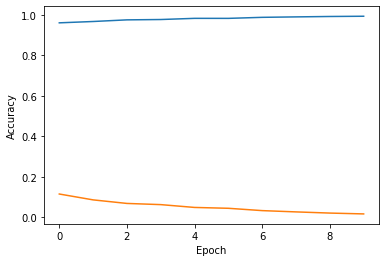

In [39]:
import matplotlib.pyplot as plt

plt.plot(H.history['accuracy'], label='accuracy')
plt.plot(H.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

Task 3 https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/reviews?pli=1#h.p_bfIevyGdJprA

In [6]:
import json
raw = []
for line in open('goodreads_reviews_spoiler.json', 'r'):
    raw.append(json.loads(line))

In [7]:
df = []
for book in raw:
    for review in book['review_sentences']:
        df.append(review)
del raw

In [8]:
df = pd.DataFrame(df[:50000], columns = ['Is_spoiler', 'Review'])

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['Is_spoiler'], axis = 1)
y = df['Is_spoiler']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train.Review)

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

MemoryError: Unable to allocate 6.33 GiB for an array with shape (40000, 21252) and data type float64

In [11]:
X_test_counts = vectorizer.transform(X_test.Review)
X_test_tfidf = 

In [12]:
X_train_counts.shape

(40000, 21252)

In [13]:
X_train_counts = X_train_counts.toarray()
X_test_counts = X_test_counts.toarray()

In [14]:
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(input_dim=21252, output_dim=64))
model.add(SimpleRNN(128))
model.add(Dense(10))

In [21]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=False),
    optimizer="sgd",
    metrics=["accuracy"],
)


model.fit( 
    X_train_counts, y_train, validation_data=(X_test_counts, y_test), batch_size=64, epochs=1
)

625/625 [==============================] - 62843s 101s/step - loss: 0.1787 - accuracy: 0.9890 - val_loss: 0.1918 - val_accuracy: 0.9881
